In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score, accuracy_score
from scipy.stats import mode


In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["Area", "Perimeter","Compactness", "Kernel_Length", "Kernel_Width", "Asymmetry_Coeff", "Kernel_Groove", "Class"]


seeds = pd.read_csv(url, sep=r"\s+", header=None, names=columns)


X = seeds.iloc[:, :-1]  # the first 7 colums are the features 
y = seeds.iloc[:, -1] - 1  # Ensures that the label is the last column and starts at 0


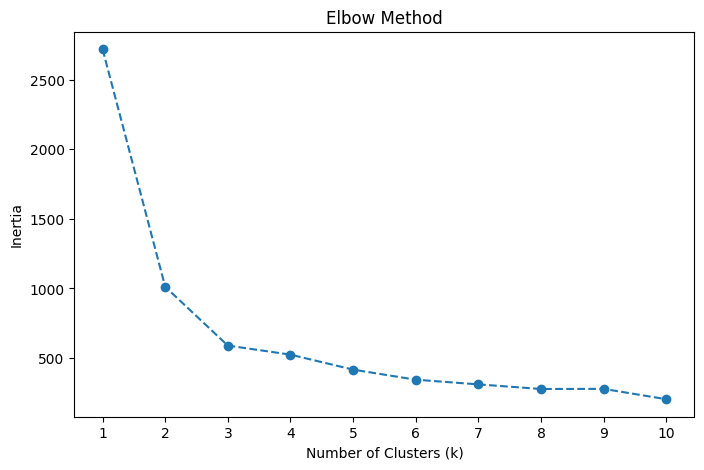

In [12]:

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

Accuracy: 0.90
(ARI): 0.72


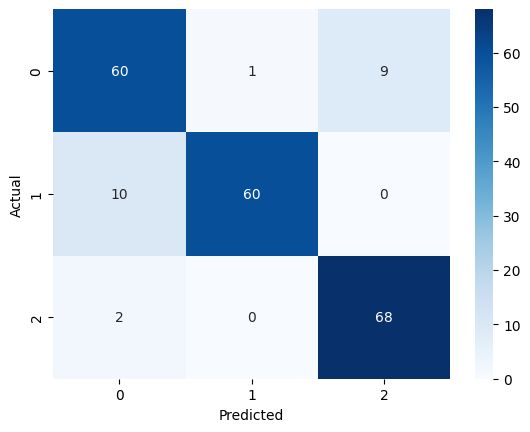

In [14]:
# Map cluster labels to match true labels
labels = np.zeros_like(y_pred)
for i in range(3):  
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]


accuracy = accuracy_score(y, labels)
ari = adjusted_rand_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")
conf_matrix = confusion_matrix(y, labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
